In [3]:
import os
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import display, clear_output


In [4]:
def inspect_sample_csvs(base_path='/kaggle/input/assessmentround/data'):
    """
    Locate CSV files in the GHI and PR directories, print a few example paths,
    and show the first five rows of the first file found in each folder.
    """
    ghi_folder = os.path.join(base_path, 'GHI')
    pr_folder = os.path.join(base_path, 'PR')
    
    ghi_files = []
    pr_files = []
    
    # Search for CSVs inside the GHI folder
    for root, _, files in os.walk(ghi_folder):
        for filename in files:
            if filename.lower().endswith('.csv'):
                ghi_files.append(os.path.join(root, filename))
    
    # Search for CSVs inside the PR folder
    for root, _, files in os.walk(pr_folder):
        for filename in files:
            if filename.lower().endswith('.csv'):
                pr_files.append(os.path.join(root, filename))
    
    ghi_files.sort()
    pr_files.sort()
    
    # Print a few GHI file paths to verify
    print("Sample GHI file paths:")
    if ghi_files:
        for path in ghi_files[:5]:
            print("    ", path)
    else:
        print(f"    No CSV files found in {ghi_folder}")
        
    print("\nSample PR file paths:")
    if pr_files:
        for path in pr_files[:5]:
            print("    ", path)
    else:
        print(f"    No CSV files found in {pr_folder}")
    
    # Show first five rows of the first GHI file, if available
    if ghi_files:
        print(f"\nPreview of GHI data from {ghi_files[0]}:")
        sample_ghi = pd.read_csv(ghi_files[0])
        display(sample_ghi.head())
    else:
        print("\nNo GHI data to preview.")
    
    # Show first five rows of the first PR file, if available
    if pr_files:
        print(f"\nPreview of PR data from {pr_files[0]}:")
        sample_pr = pd.read_csv(pr_files[0])
        display(sample_pr.head())
    else:
        print("\nNo PR data to preview.")

# Run the function to see results
inspect_sample_csvs()

Sample GHI file paths:
     /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-01.csv
     /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-06.csv
     /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-11.csv
     /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-16.csv
     /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-21.csv

Sample PR file paths:
     /kaggle/input/assessmentround/data/PR/2019-07/2019-07-01.csv
     /kaggle/input/assessmentround/data/PR/2019-07/2019-07-06.csv
     /kaggle/input/assessmentround/data/PR/2019-07/2019-07-11.csv
     /kaggle/input/assessmentround/data/PR/2019-07/2019-07-16.csv
     /kaggle/input/assessmentround/data/PR/2019-07/2019-07-21.csv

Preview of GHI data from /kaggle/input/assessmentround/data/GHI/2019-07/2019-07-01.csv:


Date       GHI
0  2019-07-01  3.256608
1  2019-07-02  3.976767
2  2019-07-03  2.811867
3  2019-07-04  3.658408
4  2019-07-05  5.590683


Preview of PR data from /kaggle/input/assessmentround/data/PR/2019-07/2019-07-01.csv:


Date         PR
0  2019-07-01  69.575676
1  2019-07-02  79.314411
2  2019-07-03  61.020006
3  2019-07-04  83.262576
4  2019-07-05  82.124440

In [5]:
def preprocess_pv_data(base_path='/kaggle/input/assessmentround/data',
                       output_csv='/kaggle/working/pr_ghi_merged.csv'):
    
    ghi_folder = os.path.join(base_path, 'GHI')
    pr_folder = os.path.join(base_path, 'PR')

    # Read every CSV under GHI/, collect into a list
    ghi_list = []
    for root, _, files in os.walk(ghi_folder):
        for fname in files:
            if fname.lower().endswith('.csv'):
                path = os.path.join(root, fname)
                temp = pd.read_csv(path, parse_dates=['Date'])
                if 'Date' not in temp.columns or 'GHI' not in temp.columns:
                    raise ValueError(f"Expected columns 'Date' and 'GHI' in {path}, but got {temp.columns.tolist()}")
                ghi_list.append(temp[['Date', 'GHI']])

    if not ghi_list:
        raise FileNotFoundError(f"No CSV files found under {ghi_folder}")

    df_ghi = pd.concat(ghi_list, ignore_index=True)

    # Read every CSV under PR/, collect into a list
    pr_list = []
    for root, _, files in os.walk(pr_folder):
        for fname in files:
            if fname.lower().endswith('.csv'):
                path = os.path.join(root, fname)
                temp = pd.read_csv(path, parse_dates=['Date'])
                if 'Date' not in temp.columns or 'PR' not in temp.columns:
                    raise ValueError(f"Expected columns 'Date' and 'PR' in {path}, but got {temp.columns.tolist()}")
                pr_list.append(temp[['Date', 'PR']])

    if not pr_list:
        raise FileNotFoundError(f"No CSV files found under {pr_folder}")

    df_pr = pd.concat(pr_list, ignore_index=True)

    # Merge on Date so we only keep days present in both sets
    merged = pd.merge(df_ghi, df_pr, on='Date', how='inner')

    # Sort by date and reset the index
    merged.sort_values('Date', inplace=True)
    merged.reset_index(drop=True, inplace=True)

    # Save to a single CSV for later use
    merged.to_csv(output_csv, index=False)
    return merged

# If you run this as a script, it will execute the function and show a quick summary.
if __name__ == "__main__":
    result = preprocess_pv_data()
    print("Merged DataFrame has shape:", result.shape)
    print("\nFirst few rows:")
    print(result.head())
    print("\nLast few rows:")
    print(result.tail())
    print(f"\nCombined CSV written to /kaggle/working/pr_ghi_merged.csv")

Merged DataFrame has shape: (982, 3)

First few rows:
        Date       GHI         PR
0 2019-07-01  3.256608  69.575676
1 2019-07-02  3.976767  79.314411
2 2019-07-03  2.811867  61.020006
3 2019-07-04  3.658408  83.262576
4 2019-07-05  5.590683  82.124440

Last few rows:
          Date       GHI         PR
977 2022-03-20  4.226183  81.632738
978 2022-03-21  3.431675  71.057353
979 2022-03-22  3.580492  81.631509
980 2022-03-23  4.997617  71.906149
981 2022-03-24  5.125050  79.911798

Combined CSV written to /kaggle/working/pr_ghi_merged.csv


In [6]:
def inspect_merged_csv(csv_path='/kaggle/working/pr_ghi_merged.csv'):
    """
    Open the combined CSV and report on:
      - Number of rows and columns
      - Data types for each column
      - Count of missing values per column
      - The first and last five rows
      - Basic summary statistics for GHI and PR
      - The date range covered by the data
    """
    # Load the CSV, making sure 'Date' is parsed as a datetime
    data = pd.read_csv(csv_path, parse_dates=['Date'])
    
    # Print the shape of the DataFrame
    print(f"DataFrame shape: {data.shape}\n")
    
    # Show the data types of each column
    print("Column data types:")
    print(data.dtypes, "\n")
    
    # Count missing values in each column
    print("Missing values by column:")
    print(data.isna().sum(), "\n")
    
    # Show the first five rows
    print("First five rows:")
    print(data.head(), "\n")
    
    # Show the last five rows
    print("Last five rows:")
    print(data.tail(), "\n")
    
    # Display summary statistics for GHI and PR
    print("Summary statistics for GHI and PR:")
    print(data[['GHI', 'PR']].describe(), "\n")
    
    # Show the date range
    start_date = data['Date'].min().date()
    end_date = data['Date'].max().date()
    print(f"Date range: {start_date} to {end_date}\n")

# If this script is run directly, execute the inspection function
if __name__ == "__main__":
    inspect_merged_csv()


DataFrame shape: (982, 3)

Column data types:
Date    datetime64[ns]
GHI            float64
PR             float64
dtype: object 

Missing values by column:
Date    0
GHI     0
PR      0
dtype: int64 

First five rows:
        Date       GHI         PR
0 2019-07-01  3.256608  69.575676
1 2019-07-02  3.976767  79.314411
2 2019-07-03  2.811867  61.020006
3 2019-07-04  3.658408  83.262576
4 2019-07-05  5.590683  82.124440 

Last five rows:
          Date       GHI         PR
977 2022-03-20  4.226183  81.632738
978 2022-03-21  3.431675  71.057353
979 2022-03-22  3.580492  81.631509
980 2022-03-23  4.997617  71.906149
981 2022-03-24  5.125050  79.911798 

Summary statistics for GHI and PR:
              GHI          PR
count  982.000000  982.000000
mean     4.629912   72.714933
std      1.024159    7.294222
min      1.413825   60.023886
25%      4.021665   66.309422
50%      4.737796   72.947945
75%      5.312283   79.111721
max      6.947317   84.980120 

Date range: 2019-07-01 to 2022-03-

In [7]:
def visualize_pr_data(merged_csv_path='/kaggle/working/pr_ghi_merged.csv',
                      output_image_path='/kaggle/working/PR_plot.png'):
    """
    Create a plot showing daily Performance Ratio (PR) over time, color-coded by GHI,
    with a 30-day moving average line, an annual budget line, and an inset table summarizing
    recent PR averages.
    """
    # Load the merged data and make sure dates are parsed correctly
    data = pd.read_csv(merged_csv_path, parse_dates=['Date'])
    # Sort chronologically just in case
    data.sort_values('Date', inplace=True)
    data.reset_index(drop=True, inplace=True)

    # Compute a 30-day rolling average of PR
    data['PR_avg30'] = data['PR'].rolling(window=30, min_periods=1).mean()

    # Assign a fiscal-year index: FY0 = July 2019–June 2020, FY1 = July 2020–June 2021, etc.
    def get_fiscal_index(d):
        year, month = d.year, d.month
        if month >= 7:
            return year - 2019
        else:
            return (year - 1) - 2019

    data['FY_index'] = data['Date'].apply(get_fiscal_index).clip(lower=0)

    # Calculate the “budget” PR line, starting at 73.9 and dropping 0.8 each fiscal year
    base_budget = 73.9
    data['Budget_PR'] = base_budget - 0.8 * data['FY_index']

    # Helper to pick colors based on GHI ranges
    def choose_color(ghi_value):
        if ghi_value < 2:
            return 'navy'
        elif ghi_value < 4:
            return 'lightblue'
        elif ghi_value < 6:
            return 'orange'
        else:
            return 'brown'

    data['GHI_color'] = data['GHI'].apply(choose_color)

    # Start plotting
    plt.figure(figsize=(15, 7))
    ax = plt.gca()

    # Plot daily PR as a scatter, color-coded by GHI bucket
    ax.scatter(
        data['Date'],
        data['PR'],
        c=data['GHI_color'],
        s=20,
        alpha=0.7,
        label='Daily PR'
    )

    # Overlay the 30-day moving average of PR in red
    ax.plot(
        data['Date'],
        data['PR_avg30'],
        color='red',
        linewidth=2,
        label='30-day MA'
    )

    # Overlay the annual budget PR line in dark green
    ax.plot(
        data['Date'],
        data['Budget_PR'],
        color='darkgreen',
        linewidth=2,
        label='Budget PR'
    )

    # Count how many days each fiscal year exceeded the budget PR
    fy_counts = data[data['PR'] > data['Budget_PR']].groupby('FY_index').size()
    for fy_idx, count in fy_counts.items():
        # Place the count annotation around January of the following calendar year
        anno_year = 2019 + fy_idx + 1
        anno_date = datetime(anno_year, 1, 15)
        # Find the highest PR in that fiscal year to position the text just above
        max_pr_in_fy = data.loc[data['FY_index'] == fy_idx, 'PR'].max()
        ax.text(
            anno_date,
            max_pr_in_fy + 1,
            f'>{count}',
            color='darkgreen',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    # Label and format the main axes
    ax.set_title('Performance Ratio (PR) Over Time with GHI Color Coding', fontsize=16, weight='bold')
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('PR', fontsize=14)
    ax.legend(loc='upper left')

    # Build the inset table: average PR over the last 7, 30, 60, 90, and 180 days
    last_day = data['Date'].max()
    windows = [7, 30, 60, 90, 180]
    recent_averages = []
    for w in windows:
        subset = data[data['Date'] >= (last_day - pd.Timedelta(days=w-1))]
        avg_val = subset['PR'].mean()
        recent_averages.append((f'Last {w}d', avg_val))

    # Place the inset table in the bottom-right corner
    inset_ax = plt.axes([0.68, 0.15, 0.25, 0.25])
    inset_ax.axis('off')

    # Format the table data for display
    table_rows = [[label, f"{val:.2f}"] for label, val in recent_averages]
    table = inset_ax.table(
        cellText=table_rows,
        colLabels=['Period', 'Avg PR'],
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # Final layout adjustments and save
    plt.tight_layout()
    plt.savefig(output_image_path, dpi=300)
    plt.show()


# Run it
visualize_pr_data()


/tmp/ipykernel_35/4020155856.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [8]:
import numpy as np 
def visualize_pr_data_exquisite_high_res(
    merged_csv_path='/kaggle/working/pr_ghi_merged.csv',
    output_image_path='/kaggle/working/pr_plot1.png'
):
    """
    Read the merged PV data, then draw a high-resolution PR chart:
    - Scatter daily PR, colored by GHI level
    - 30-day moving average in red
    - Annual budget PR (dashed green), with light shading by fiscal year
    - Labels showing how many days exceeded budget each fiscal year
    - Inset table listing recent PR averages (7, 30, 60, 90, 180 days)
    Saves a 600 DPI PNG.
    """
    # Load the combined CSV and make sure dates sort correctly
    data = pd.read_csv(merged_csv_path, parse_dates=['Date'])
    data.sort_values('Date', inplace=True)
    data.reset_index(drop=True, inplace=True)

    # Rolling average of PR over the last 30 days
    data['PR_rolling30'] = data['PR'].rolling(window=30, min_periods=1).mean()

    # A helper to assign each date to a fiscal year index:
    # Index 0 = Jul 2019–Jun 2020, Index 1 = Jul 2020–Jun 2021, etc.
    def fiscal_year_index(dt):
        if dt.month >= 7:
            return dt.year - 2019
        else:
            return (dt.year - 1) - 2019

    data['FY_index'] = data['Date'].apply(fiscal_year_index).clip(lower=0)

    # Compute the “budget PR” for each day: start at 73.9, then subtract 0.8 per fiscal year
    data['Budget_PR'] = 73.9 - 0.8 * data['FY_index']

    # Choose a distinct color for each GHI bucket
    def color_by_ghi(ghi):
        if ghi < 2:
            return '#001f3f'   # deep navy
        elif ghi < 4:
            return '#ADD8E6'   # light blue
        elif ghi < 6:
            return '#FF8C00'   # dark orange
        else:
            return '#8B4513'   # brown

    data['GHI_color'] = data['GHI'].apply(color_by_ghi)

    # Set up a 16×8 inch figure at 600 DPI for maximum clarity
    fig, ax = plt.subplots(
        figsize=(16, 8),
        dpi=600,
        facecolor='white'
    )
    plt.style.use('seaborn-whitegrid')

    # Draw a very light grey background for each fiscal year span
    start_year = 2019
    end_year = data['Date'].dt.year.max() + 1
    boundaries = [datetime(year, 7, 1) for year in range(start_year, end_year + 1)]
    for i in range(len(boundaries) - 1):
        ax.axvspan(
            boundaries[i],
            boundaries[i + 1],
            color='lightgrey',
            alpha=0.05,
            linewidth=0
        )

    # Plot each day's PR as a circle with a thin black rim
    ax.scatter(
        data['Date'],
        data['PR'],
        c=data['GHI_color'],
        s=30,
        alpha=0.9,
        edgecolor='black',
        linewidth=0.3,
        label='Daily PR'
    )

    # Overlay the 30-day rolling average as a slightly thicker red line
    ax.plot(
        data['Date'],
        data['PR_rolling30'],
        color='red',
        linewidth=2.8,
        label='30-day MA'
    )

    # Overlay the budget PR as a dark-green dashed line
    ax.plot(
        data['Date'],
        data['Budget_PR'],
        color='darkgreen',
        linewidth=2.2,
        linestyle='--',
        label='Budget PR'
    )

    # For each fiscal year, count how many days exceeded the budget and label it
    counts = data[data['PR'] > data['Budget_PR']].groupby('FY_index').size()
    for fiscal_idx, count in counts.items():
        # Position the annotation around January 15 of the next calendar year
        anno_date = datetime(2019 + fiscal_idx + 1, 1, 15)
        # If that date lies outside our data range, clamp it to a reasonable spot
        if anno_date < data['Date'].min():
            anno_date = data['Date'].min() + (data['Date'].max() - data['Date'].min()) * 0.1
        if anno_date > data['Date'].max():
            anno_date = data['Date'].max() - (data['Date'].max() - data['Date'].min()) * 0.1

        # Find the maximum PR that fiscal year, then place the text slightly above it
        max_pr_val = data.loc[data['FY_index'] == fiscal_idx, 'PR'].max()
        ax.annotate(
            f'>{count}',
            xy=(anno_date, max_pr_val + 0.6),
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='darkgreen',
            arrowprops=dict(
                arrowstyle='-|>',
                color='darkgreen',
                lw=0.8,
                alpha=0.8
            )
        )

    # Set titles, labels, and limits
    ax.set_title(
        "Performance Ratio Over Time (High-Res)",
        fontsize=22,
        fontweight='bold',
        pad=16
    )
    ax.set_xlabel("Date", fontsize=18, labelpad=10)
    ax.set_ylabel("PR", fontsize=18, labelpad=10)
    ax.set_ylim(data['PR'].min() - 1.5, data['PR'].max() + 1.5)

    # Show a tick every three months, formatted as "YYYY-MM"
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    plt.setp(ax.get_yticklabels(), fontsize=12)

    # Build a custom legend with explicit colored markers and line styles
    from matplotlib.lines import Line2D
    legend_items = [
        Line2D([0], [0], marker='o', color='w', label='< 2 (Navy)',
               markerfacecolor='#001f3f', markersize=10, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='2–4 (Light Blue)',
               markerfacecolor='#ADD8E6', markersize=10, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='4–6 (Orange)',
               markerfacecolor='#FF8C00', markersize=10, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='> 6 (Brown)',
               markerfacecolor='#8B4513', markersize=10, markeredgecolor='k'),
        Line2D([0], [0], color='red', lw=2.8, label='30-day MA'),
        Line2D([0], [0], color='darkgreen', lw=2.2, linestyle='--', label='Budget PR')
    ]
    ax.legend(
        handles=legend_items,
        loc='upper left',
        fontsize=14,
        frameon=True,
        framealpha=0.9,
        borderpad=0.6,
        edgecolor='black'
    )

    # Create an inset box that lists the average PR for the last 7, 30, 60, 90, and 180 days
    latest_date = data['Date'].max()
    windows = [7, 30, 60, 90, 180]
    recent_averages = {}
    for w in windows:
        subset = data[data['Date'] >= latest_date - pd.Timedelta(days=w - 1)]
        recent_averages[f'Last {w}d'] = subset['PR'].mean() if not subset.empty else np.nan

    inset_ax = fig.add_axes([0.68, 0.12, 0.28, 0.28])
    inset_ax.axis('off')
    rows = [
        [period, f"{val:.2f}" if not np.isnan(val) else 'N/A']
        for period, val in recent_averages.items()
    ]
    table = inset_ax.table(
        cellText=rows,
        colLabels=['Period', 'Avg PR'],
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.25, 1.35)
    inset_ax._frameon = True

    # Save the figure at 600 DPI and show it
    fig.tight_layout()
    fig.savefig(output_image_path, dpi=600, bbox_inches='tight', facecolor='white')
    plt.show()


# To run the function and generate the PNG:
visualize_pr_data_exquisite_high_res()


/tmp/ipykernel_35/3309262634.py:55: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/tmp/ipykernel_35/3309262634.py:197: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


In [9]:
def visualize_pr_with_extras(
        merged_csv_path='/kaggle/working/pr_ghi_merged.csv',
        output_image_path='/kaggle/working/pr_plot2.png'):
    
    # Load and sort the data by date
    df = pd.read_csv(merged_csv_path, parse_dates=['Date'])
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)

    # Calculate a 30-day rolling average of PR
    df['PR_rolling30'] = df['PR'].rolling(window=30, min_periods=1).mean()

    # Assign each date to a fiscal-year index: 0 = Jul 2019–Jun 2020, 1 = Jul 2020–Jun 2021, etc.
    def get_fiscal_index(d):
        if d.month >= 7:
            return d.year - 2019
        return (d.year - 1) - 2019

    df['FY_index'] = df['Date'].apply(get_fiscal_index).clip(lower=0)

    # Calculate the budget PR line: starting at 73.9 and dropping 0.8 each fiscal year
    df['Budget_PR'] = 73.9 - 0.8 * df['FY_index']

    # Choose a color based on GHI bucket
    def pick_color(ghi_value):
        if ghi_value < 2:
            return '#001f3f'  # navy
        elif ghi_value < 4:
            return '#ADD8E6'  # light blue
        elif ghi_value < 6:
            return '#FF8C00'  # orange
        return '#8B4513'     # brown

    df['GHI_color'] = df['GHI'].apply(pick_color)

    # Prepare a table of average PR by month (1=Jan, … 12=Dec)
    df['Month'] = df['Date'].dt.month
    monthly_average_pr = df.groupby('Month')['PR'].mean().reindex(range(1, 13))

    # Compute Pearson correlation and regression line for PR vs GHI
    r_value, _ = stats.pearsonr(df['GHI'], df['PR'])
    slope, intercept, _, _, _ = stats.linregress(df['GHI'], df['PR'])

    # Set up a figure with two rows and two columns (main plot spans the top row)
    fig = plt.figure(figsize=(16, 12), dpi=300)
    grid = fig.add_gridspec(2, 2, height_ratios=[2, 1], hspace=0.3, wspace=0.3)

    # Main time-series plot (row 0, both columns)
    ax_main = fig.add_subplot(grid[0, :])

    # Lightly shade each fiscal year (July to next June)
    start_year = 2019
    end_year = df['Date'].dt.year.max() + 1
    boundaries = [datetime(yr, 7, 1) for yr in range(start_year, end_year + 1)]
    for i in range(len(boundaries) - 1):
        ax_main.axvspan(
            boundaries[i], boundaries[i + 1],
            color='lightgrey', alpha=0.05
        )

    # Plot daily PR points, color-coded by GHI bucket
    ax_main.scatter(
        df['Date'],
        df['PR'],
        c=df['GHI_color'],
        s=20,
        alpha=0.8,
        edgecolor='k',
        linewidth=0.2
    )

    # Overlay 30-day rolling average in red
    ax_main.plot(
        df['Date'],
        df['PR_rolling30'],
        color='red',
        linewidth=2.5,
        label='30-day MA'
    )

    # Overlay the fiscal-year budget PR line (dashed green)
    ax_main.plot(
        df['Date'],
        df['Budget_PR'],
        color='darkgreen',
        linewidth=2,
        linestyle='--',
        label='Budget PR'
    )

    # Annotate how many days exceeded the budget in each fiscal year
    counts_per_fy = df[df['PR'] > df['Budget_PR']].groupby('FY_index').size()
    for fy_idx, count in counts_per_fy.items():
        # Place the text around January 15 of the next calendar year
        annot_date = datetime(2019 + fy_idx + 1, 1, 15)
        # Clamp the annotation date within the data range
        if annot_date < df['Date'].min():
            annot_date = df['Date'].min() + (df['Date'].max() - df['Date'].min()) * 0.1
        if annot_date > df['Date'].max():
            annot_date = df['Date'].max() - (df['Date'].max() - df['Date'].min()) * 0.1

        highest_pr = df.loc[df['FY_index'] == fy_idx, 'PR'].max()
        ax_main.annotate(
            f'>{count}',
            xy=(annot_date, highest_pr + 0.5),
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold',
            color='darkgreen',
            arrowprops=dict(arrowstyle='-|>', color='darkgreen', lw=0.8, alpha=0.8)
        )

  
    ax_main.set_title(
        "Performance Ratio (PR) Over Time with GHI Color Coding",
        fontsize=20, fontweight='bold'
    )
    ax_main.set_xlabel("Date", fontsize=14)
    ax_main.set_ylabel("PR", fontsize=14)
    ax_main.set_ylim(df['PR'].min() - 2, df['PR'].max() + 2)
    ax_main.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax_main.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax_main.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    plt.setp(ax_main.get_yticklabels(), fontsize=12)
    ax_main.legend(loc='upper left', fontsize=12, frameon=True, framealpha=0.9)

    # Bottom-left: Bar chart of average PR by month
    ax_bar = fig.add_subplot(grid[1, 0])
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax_bar.bar(
        month_labels,
        monthly_average_pr,
        color='skyblue',
        edgecolor='black'
    )
    ax_bar.set_title("Average PR by Month (Seasonal Trend)", fontsize=16, fontweight='bold')
    ax_bar.set_xlabel("Month", fontsize=12)
    ax_bar.set_ylabel("Avg PR", fontsize=12)
    plt.setp(ax_bar.get_xticklabels(), fontsize=10)
    plt.setp(ax_bar.get_yticklabels(), fontsize=10)

    # Bottom-right: Scatter of PR vs. GHI with regression line
    ax_scatter = fig.add_subplot(grid[1, 1])
    ax_scatter.scatter(
        df['GHI'],
        df['PR'],
        c='orange',
        alpha=0.7,
        edgecolor='k',
        linewidth=0.2,
        s=25
    )
    x_vals = np.linspace(df['GHI'].min(), df['GHI'].max(), 100)
    y_vals = intercept + slope * x_vals
    ax_scatter.plot(
        x_vals,
        y_vals,
        color='red',
        linewidth=2,
        label=f"Fit: y={slope:.2f}x + {intercept:.2f}"
    )
    ax_scatter.set_title(f"PR vs GHI\nPearson r = {r_value:.2f}", fontsize=16, fontweight='bold')
    ax_scatter.set_xlabel("GHI", fontsize=12)
    ax_scatter.set_ylabel("PR", fontsize=12)
    ax_scatter.legend(fontsize=10)
    plt.setp(ax_scatter.get_xticklabels(), fontsize=10)
    plt.setp(ax_scatter.get_yticklabels(), fontsize=10)

    # Save and show the combined figure
    fig.tight_layout()
    fig.savefig(output_image_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
visualize_pr_with_extras()


/tmp/ipykernel_35/469346273.py:172: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


/tmp/ipykernel_35/3834936422.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


/tmp/ipykernel_35/3834936422.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


/tmp/ipykernel_35/3834936422.py:89: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


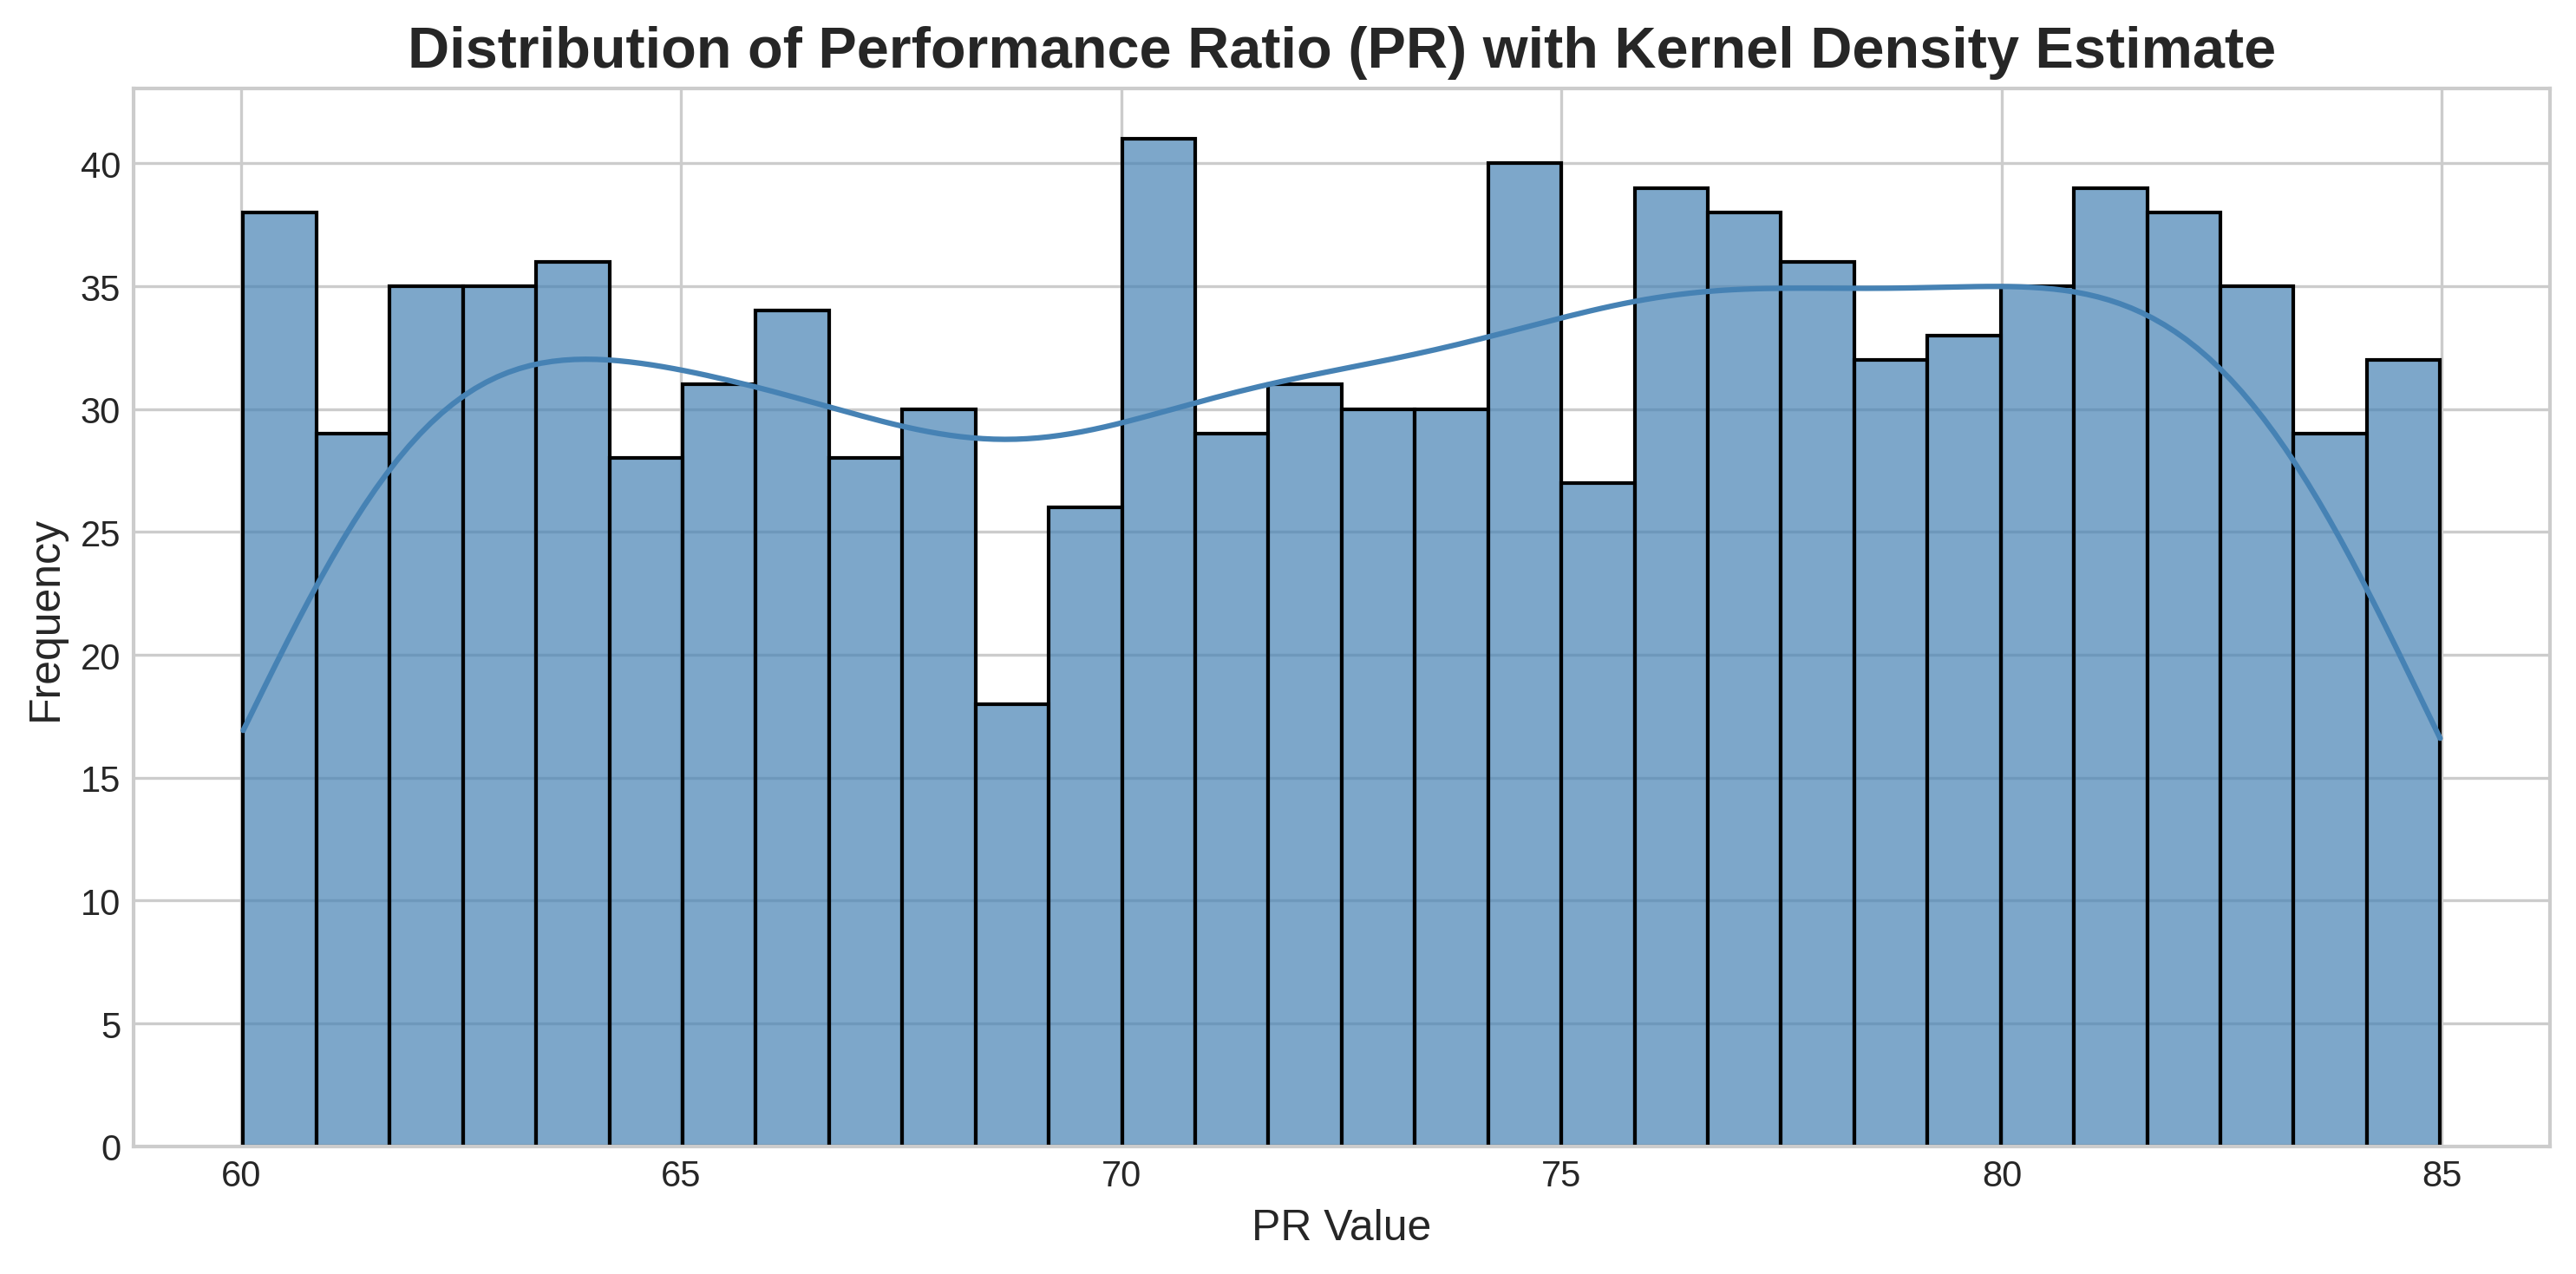

/tmp/ipykernel_35/3834936422.py:114: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
df = pd.read_csv('/kaggle/working/pr_ghi_merged.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Compute 30-day rolling mean and standard deviation of PR
df['PR_MA30'] = df['PR'].rolling(window=30, min_periods=1).mean()
df['PR_STD30'] = df['PR'].rolling(window=30, min_periods=1).std()

# Assign each date to a fiscal year index (0 = Jul 2019–Jun 2020, 1 = Jul 2020–Jun 2021, etc.)
def fiscal_year_index(d):
    year, month = d.year, d.month
    return max((year - 2019) - (0 if month >= 7 else 1), 0)

df['FY_Index'] = df['Date'].apply(fiscal_year_index)
df['Budget_PR'] = 73.9 - 0.8 * df['FY_Index']

# 1. Anomaly Detection
df['Anomaly'] = np.abs(df['PR'] - df['PR_MA30']) > (2 * df['PR_STD30'].fillna(0))

fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
plt.style.use('seaborn-whitegrid')

# Plot all PR values in light gray
ax.scatter(df['Date'], df['PR'], color='lightgray', s=20, alpha=0.6, label='Daily PR')

# Overlay anomalies in red
anomalies = df[df['Anomaly']]
ax.scatter(anomalies['Date'], anomalies['PR'], color='red', s=40,
           label='Anomaly (|PR - MA30| > 2σ)')

# Also draw the 30-day rolling average as a blue line
ax.plot(df['Date'], df['PR_MA30'], color='blue', linewidth=2, label='30-day MA of PR')

ax.set_title('PR Anomalies: Points More Than Two Standard Deviations from the 30-Day Mean',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('PR', fontsize=12)
ax.legend(fontsize=10)

# Format x-axis to show every three months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

fig.tight_layout()
fig.savefig('/kaggle/working/pr_plot3.png', dpi=300, bbox_inches='tight')
plt.show()



# 2. Rolling Volatility Plot
fig, ax1 = plt.subplots(figsize=(14, 6), dpi=300)
plt.style.use('seaborn-whitegrid')

# Left axis: daily PR and its 30-day moving average
ax1.plot(df['Date'], df['PR'], color='gray', linewidth=1, alpha=0.6, label='Daily PR')
ax1.plot(df['Date'], df['PR_MA30'], color='red', linewidth=2, label='30-day MA of PR')
ax1.set_ylabel('PR', fontsize=12, color='black')
ax1.tick_params(axis='y', labelsize=10)

# Right axis: rolling standard deviation of PR
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['PR_STD30'], color='purple', linewidth=2, label='30-day PR StdDev')
ax2.set_ylabel('PR StdDev', fontsize=12, color='purple')
ax2.tick_params(axis='y', labelsize=10, labelcolor='purple')

ax1.set_title('Daily PR with 30-Day Rolling Volatility', fontsize=16, fontweight='bold')

# Format the shared x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

fig.tight_layout()
fig.savefig('/kaggle/working/pr_plot4.png', dpi=300, bbox_inches='tight')
plt.show()



# 3. histogram with a KDE overlay

fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
plt.style.use('seaborn-whitegrid')

sns.histplot(df['PR'], bins=30, kde=True, color='steelblue',
             edgecolor='black', alpha=0.7, ax=ax)
ax.set_title('Distribution of Performance Ratio (PR) with Kernel Density Estimate',
             fontsize=16, fontweight='bold')
ax.set_xlabel('PR Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

fig.tight_layout()
fig.savefig('/kaggle/working/pr_plot5.png', dpi=300, bbox_inches='tight')
plt.show()


# 4. Monthly PR Boxplot:
# Add month name and year columns for grouping
df['Month_Name'] = df['Date'].dt.strftime('%b')  # e.g., 'Jan', 'Feb'
df['Year'] = df['Date'].dt.year

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
plt.style.use('seaborn-whitegrid')

sns.boxplot(x='Month_Name', y='PR', data=df, order=month_order,
            palette='tab20', ax=ax)
ax.set_title('Monthly Performance Ratio (PR) Boxplot (All Years Combined)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('PR', fontsize=12)
plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)

fig.tight_layout()
fig.savefig('/kaggle/working/pr_plot6.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:

df_full = pd.read_csv('/kaggle/working/pr_ghi_merged.csv', parse_dates=['Date'])
df_full.sort_values('Date', inplace=True)
min_date = df_full['Date'].min().date()
max_date = df_full['Date'].max().date()


def plot_pr_for_date_range(df, start_date=None, end_date=None, ax=None):
    """
    Draws a PR-over-time chart limited to [start_date, end_date].
    If start_date or end_date is None, defaults to the full DataFrame range.
    """
    data = df.copy()
    
    if start_date:
        data = data[data['Date'].dt.date >= start_date]
    if end_date:
        data = data[data['Date'].dt.date <= end_date]
    if data.empty:
        raise ValueError("No data in that date range.")

    # 30-day rolling average
    data['PR_rolling30'] = data['PR'].rolling(window=30, min_periods=1).mean()
    # Fiscal-year index
    def get_fy_index(d):
        return (d.year - 2019) - (0 if d.month >= 7 else 1)
    data['FY_index'] = data['Date'].apply(get_fy_index).clip(lower=0)
    # Budget line
    data['Budget_PR'] = 73.9 - 0.8 * data['FY_index']
    # Color by GHI bucket
    def color_for_ghi(val):
        if val < 2:
            return 'navy'
        elif val < 4:
            return 'lightblue'
        elif val < 6:
            return 'orange'
        return 'brown'
    data['GHI_color'] = data['GHI'].apply(color_for_ghi)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
    else:
        fig = ax.figure

    ax.clear()
    ax.scatter(
        data['Date'], data['PR'],
        c=data['GHI_color'], s=20, alpha=0.7, edgecolor='k', linewidth=0.2,
        label='Daily PR'
    )
    ax.plot(
        data['Date'], data['PR_rolling30'],
        color='red', linewidth=2, label='30-day MA'
    )
    ax.plot(
        data['Date'], data['Budget_PR'],
        color='darkgreen', linewidth=2, linestyle='--', label='Budget PR'
    )

    # Annotate >count per FY
    fy_counts = data[data['PR'] > data['Budget_PR']].groupby('FY_index').size()
    for fy_idx, count in fy_counts.items():
        anno_year = 2019 + fy_idx + 1
        anno_date = datetime(anno_year, 1, 15).date()
        # clamp to data bounds
        if anno_date < data['Date'].dt.date.min():
            anno_date = (data['Date'].dt.date.min() +
                         (data['Date'].dt.date.max() - data['Date'].dt.date.min()) // 10)
        if anno_date > data['Date'].dt.date.max():
            anno_date = (data['Date'].dt.date.max() -
                         (data['Date'].dt.date.max() - data['Date'].dt.date.min()) // 10)
        max_pr_val = data.loc[data['FY_index'] == fy_idx, 'PR'].max()
        ax.text(
            datetime(anno_date.year, anno_date.month, anno_date.day),
            max_pr_val + 1,
            f'>{count}',
            color='darkgreen', ha='center', va='bottom',
            fontsize=10, fontweight='bold'
        )

    # Title reflecting range
    title = f"PR from {data['Date'].dt.date.min()} to {data['Date'].dt.date.max()}"
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("PR", fontsize=12)
    ax.legend(loc='upper left', fontsize=10)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10)
    plt.setp(ax.get_yticklabels(), fontsize=10)

    fig.tight_layout()
    return fig, ax


start_picker = widgets.DatePicker(
    description='Start Date',
    disabled=False,
    value=min_date,
    min=min_date,
    max=max_date
)
end_picker = widgets.DatePicker(
    description='End Date',
    disabled=False,
    value=max_date,
    min=min_date,
    max=max_date
)
confirm_btn = widgets.Button(
    description='Generate Plot',
    button_style='primary'
)

output_area = widgets.Output()

def on_confirm_clicked(_):
    with output_area:
        clear_output(wait=True)
        sd = start_picker.value
        ed = end_picker.value
        if (sd is None) or (ed is None):
            print("Please pick both a start and end date.")
            return
        if sd > ed:
            print("Start date cannot be after end date.")
            return
        try:
            fig, ax = plot_pr_for_date_range(df_full, sd, ed)
            fig.savefig(f'/kaggle/working/pr_{sd}_to_{ed}.png', dpi=300)
            print(f"Plot generated for {sd} to {ed} (saved as pr_{sd}_to_{ed}.png).")
            plt.show()
        except Exception as e:
            print("Error:", e)

confirm_btn.on_click(on_confirm_clicked)

# Display the controls and an empty output area
display(widgets.HBox([start_picker, end_picker, confirm_btn]))
display(output_area)


Output()